# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

In [2]:
boston_dataset=load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Datapoints and Features

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

data['PRICE']=boston_dataset.target

In [12]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualising Data

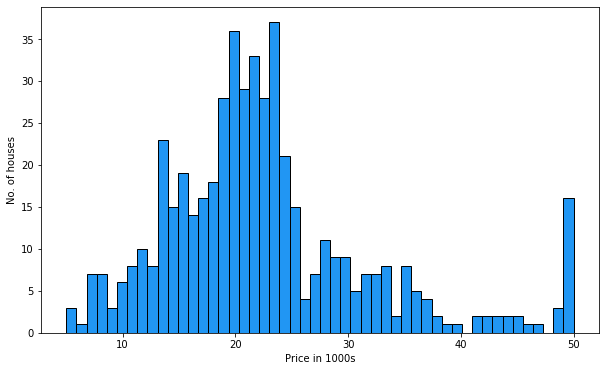

In [16]:
plt.figure(figsize=[10,6])

plt.hist(data['PRICE'],bins=50,ec='black',color='#2196F3')
plt.xlabel('Price in 1000s')
plt.ylabel('No. of houses')
plt.show()

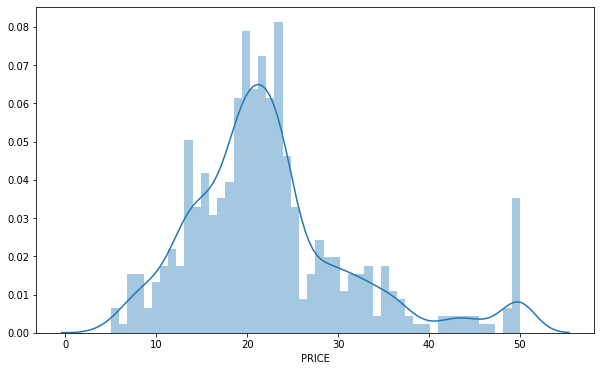

In [17]:
plt.figure(figsize=[10,6])

sns.distplot(data['PRICE'],bins=50)

plt.show()

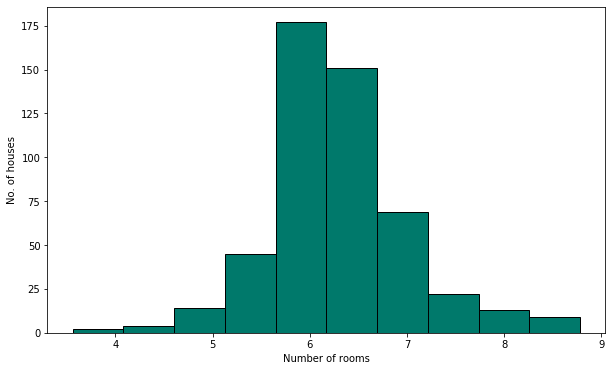

In [18]:
plt.figure(figsize=[10,6])

plt.hist(data['RM'],ec='black',color='#00796b')
plt.xlabel('Number of rooms')
plt.ylabel('No. of houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351779

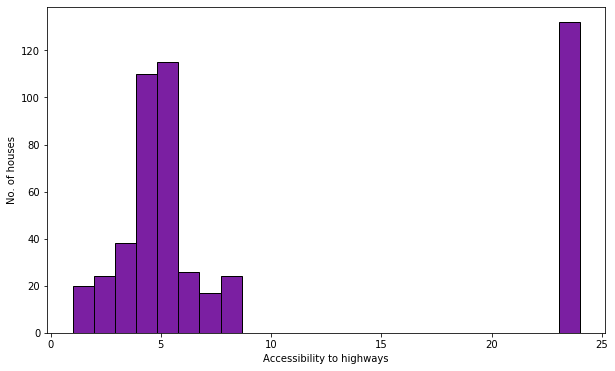

In [20]:
plt.figure(figsize=[10,6])

plt.hist(data['RAD'],bins=24,ec='black',color='#7b1fa2')
plt.xlabel('Accessibility to highways')
plt.ylabel('No. of houses')
plt.show()

In [21]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

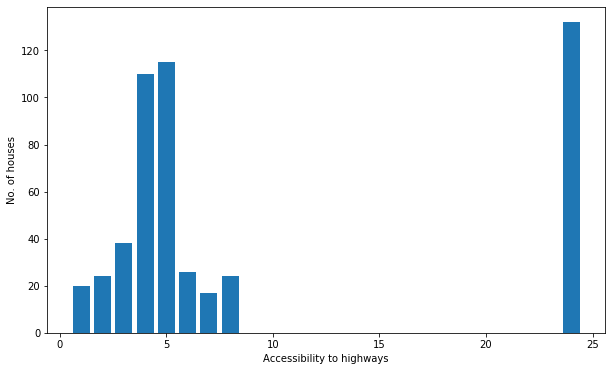

In [22]:
frequency=data['RAD'].value_counts()

plt.figure(figsize=[10,6])
plt.bar(frequency.index,height=frequency)
plt.xlabel('Accessibility to highways')
plt.ylabel('No. of houses')

plt.show()

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [24]:
print(data['PRICE'].min())
print(data['PRICE'].max())
print(data.min())

5.0
50.0
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64


In [25]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [26]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [27]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [28]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [29]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [30]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

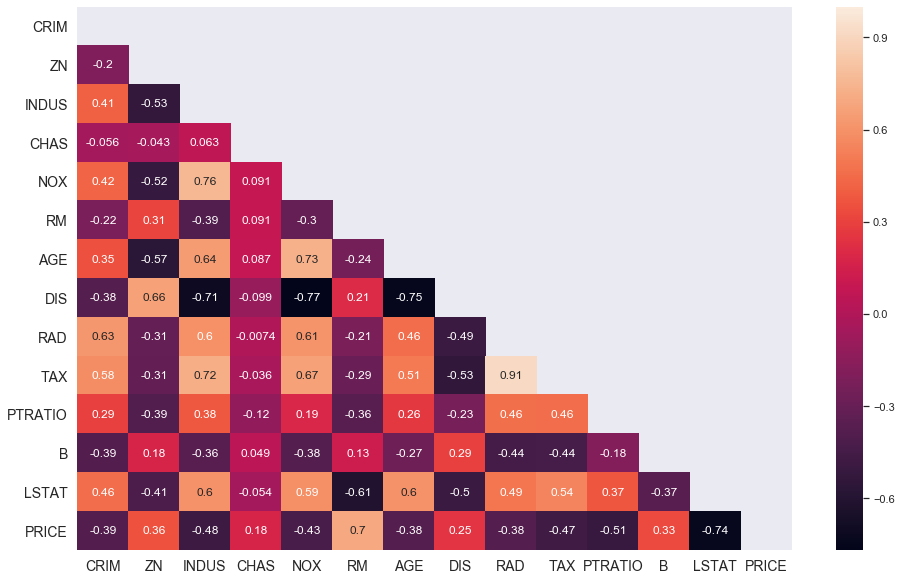

In [32]:
sns.set()
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask=mask,annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

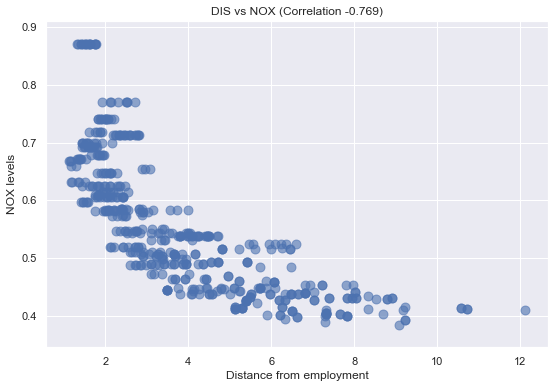

In [33]:
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=[9,6])
plt.scatter(data['DIS'],data['NOX'],alpha=0.6,s=80)
plt.xlabel('Distance from employment')
plt.ylabel('NOX levels')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})')

plt.show()

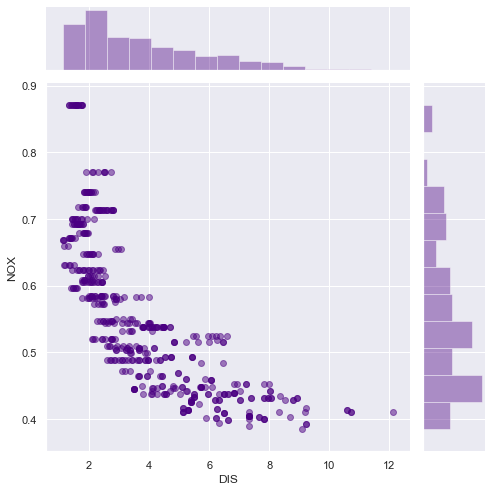

In [34]:
sns.set()
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,joint_kws={'alpha':0.5},color='indigo')

plt.show()

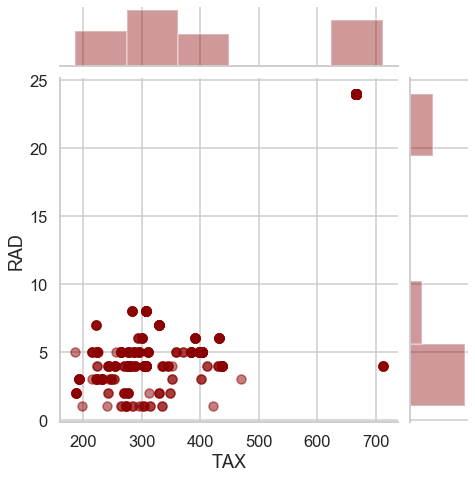

In [35]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],height=7,joint_kws={'alpha':0.5},color='darkred')

plt.show()

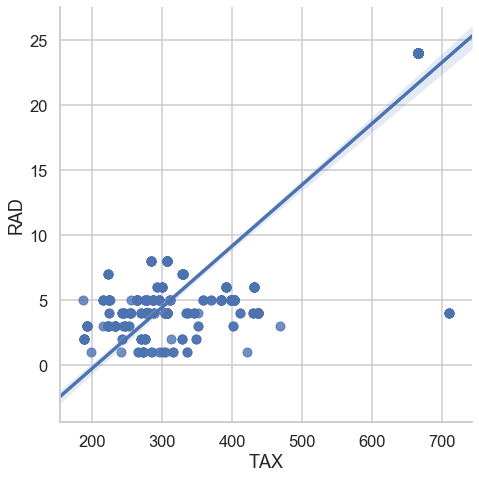

In [36]:
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

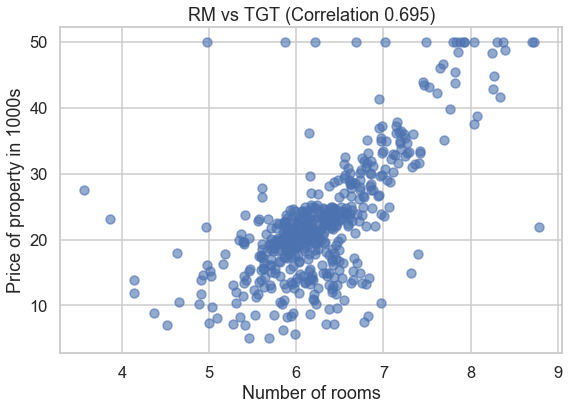

In [37]:
rm_tgt_corr=round(data['RM'].corr(data['PRICE']),3)

plt.figure(figsize=[9,6])
plt.scatter(data['RM'],data['PRICE'],alpha=0.6,s=80)
plt.xlabel('Number of rooms')
plt.ylabel('Price of property in 1000s')
plt.title(f'RM vs TGT (Correlation {rm_tgt_corr})')

plt.show()

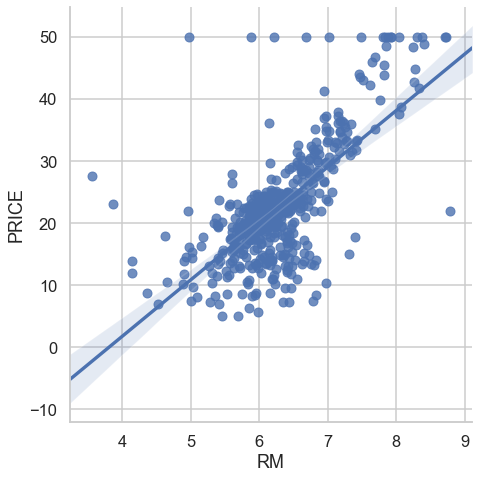

In [38]:
sns.lmplot(x='RM',y='PRICE',data=data,height=7)
plt.show()

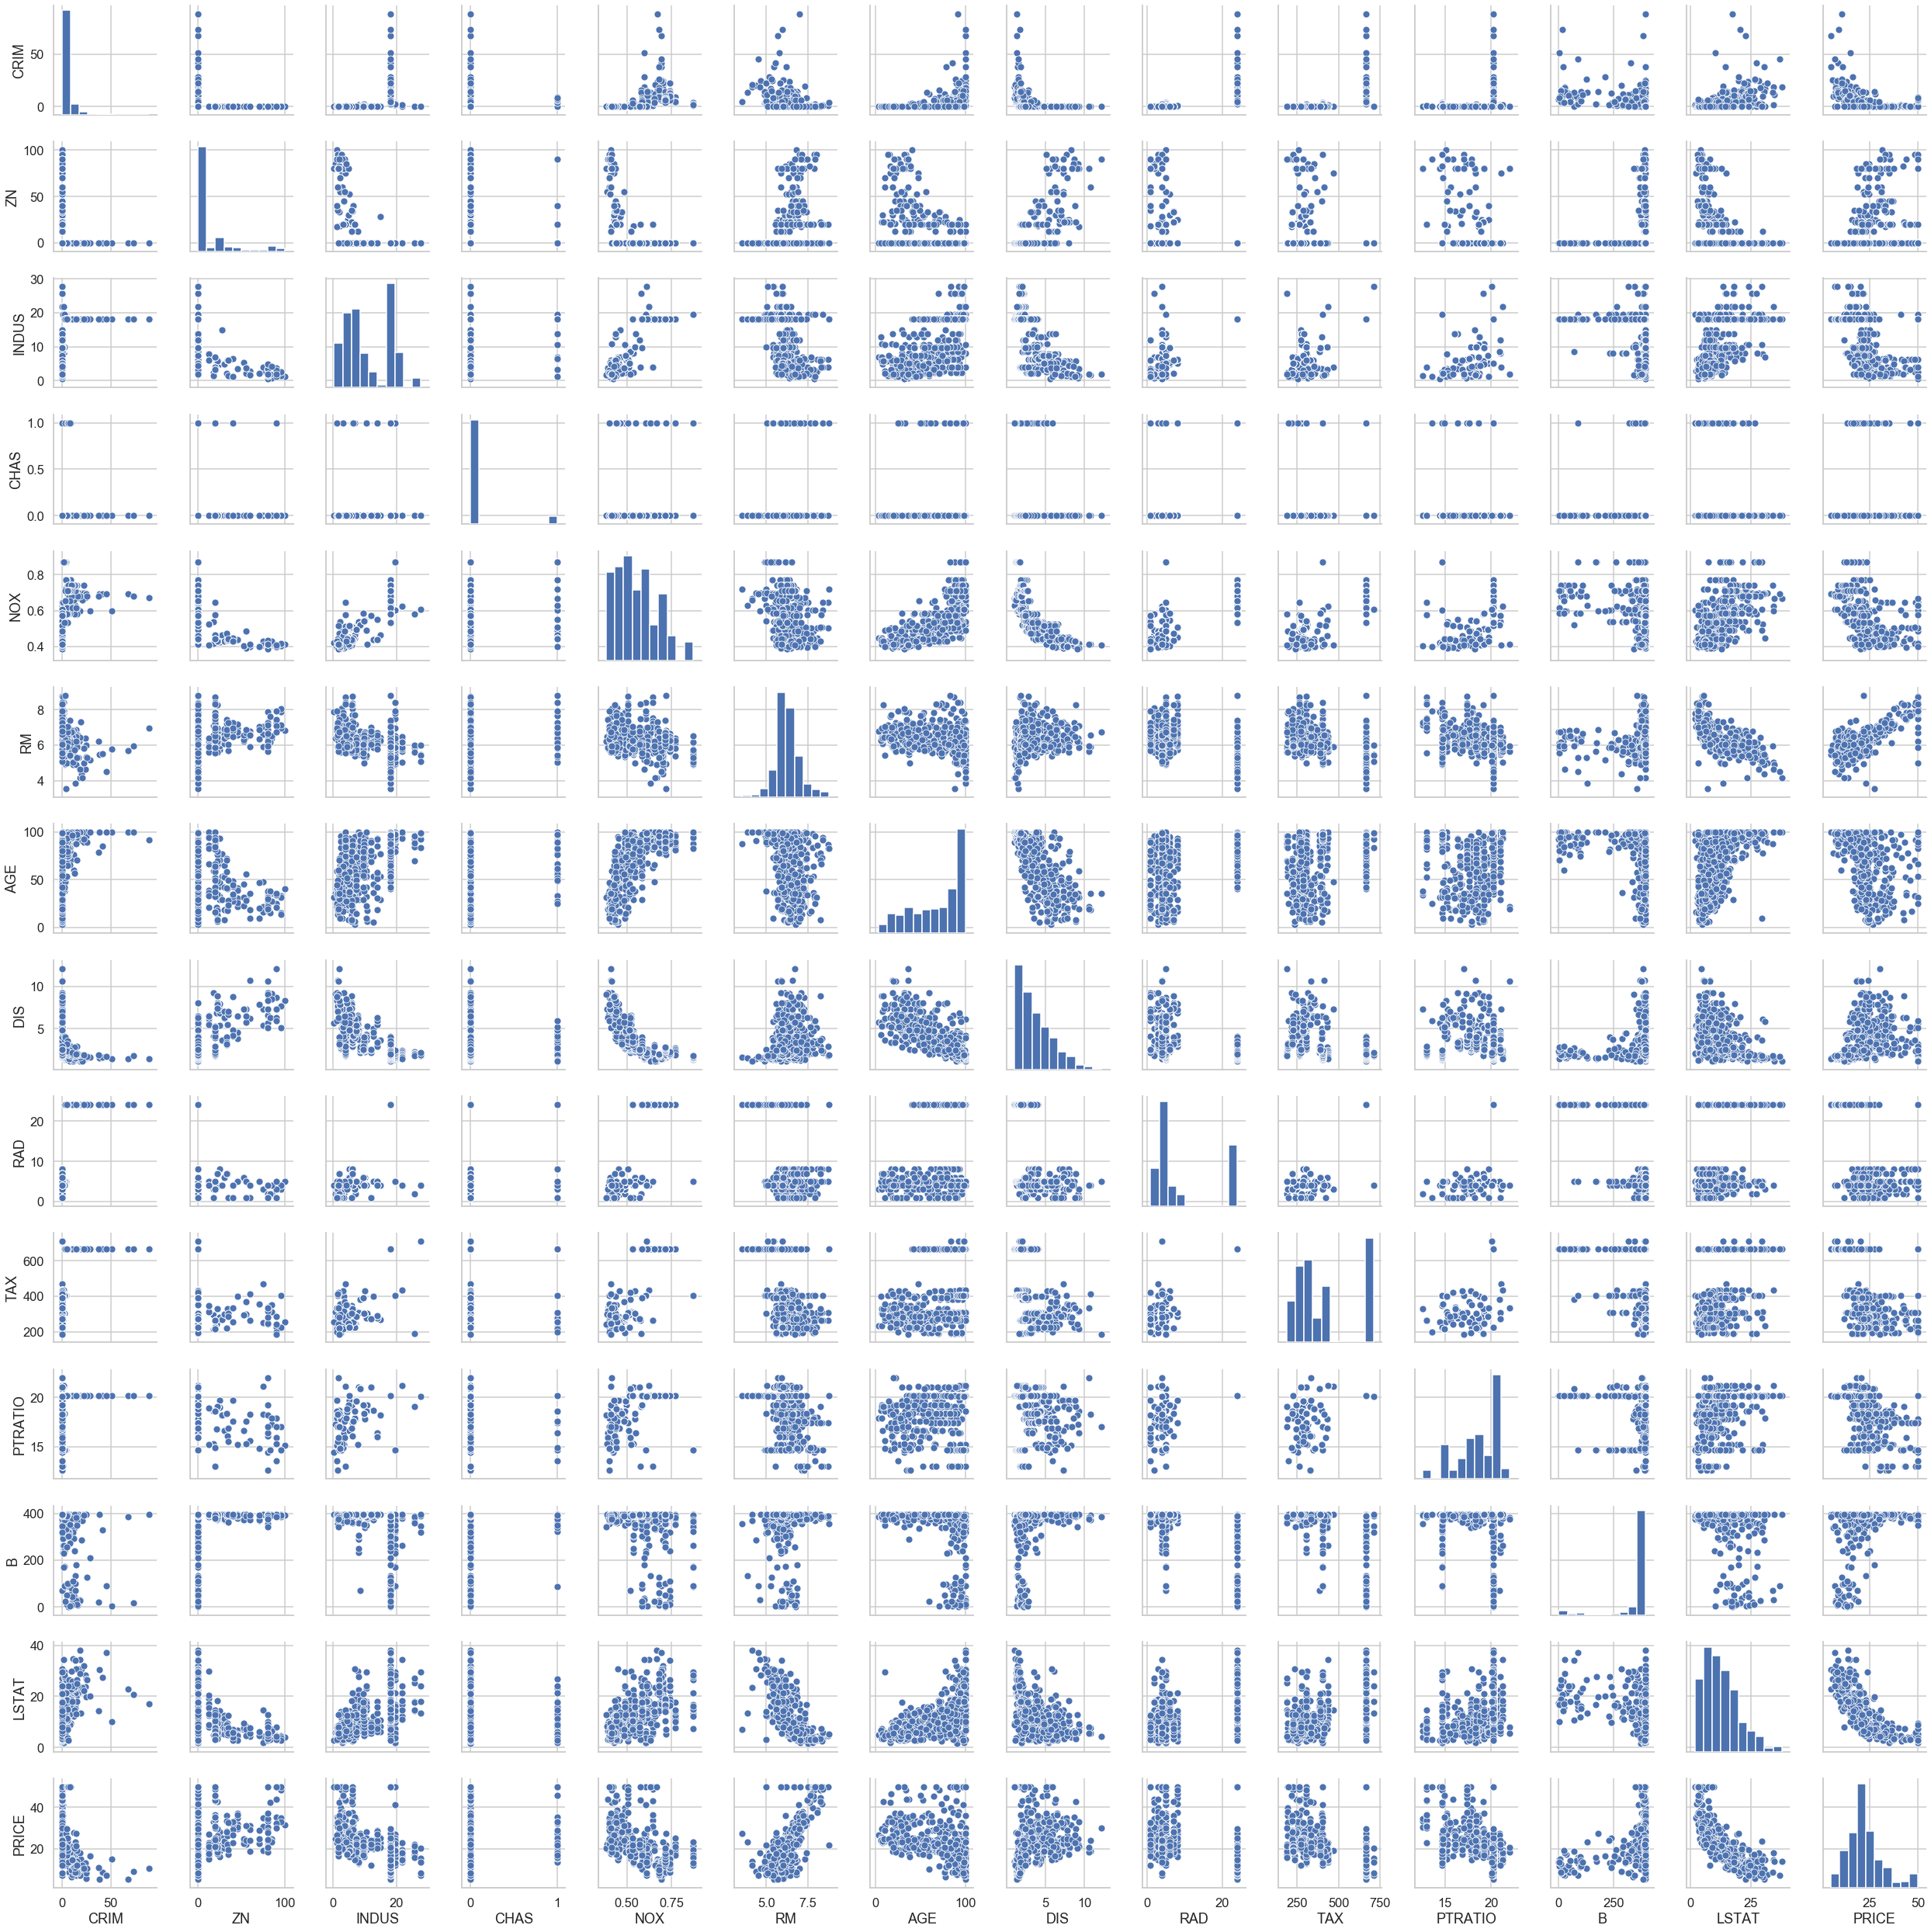

Wall time: 40.7 s


In [39]:
%%time

sns.pairplot(data=data)
plt.show()

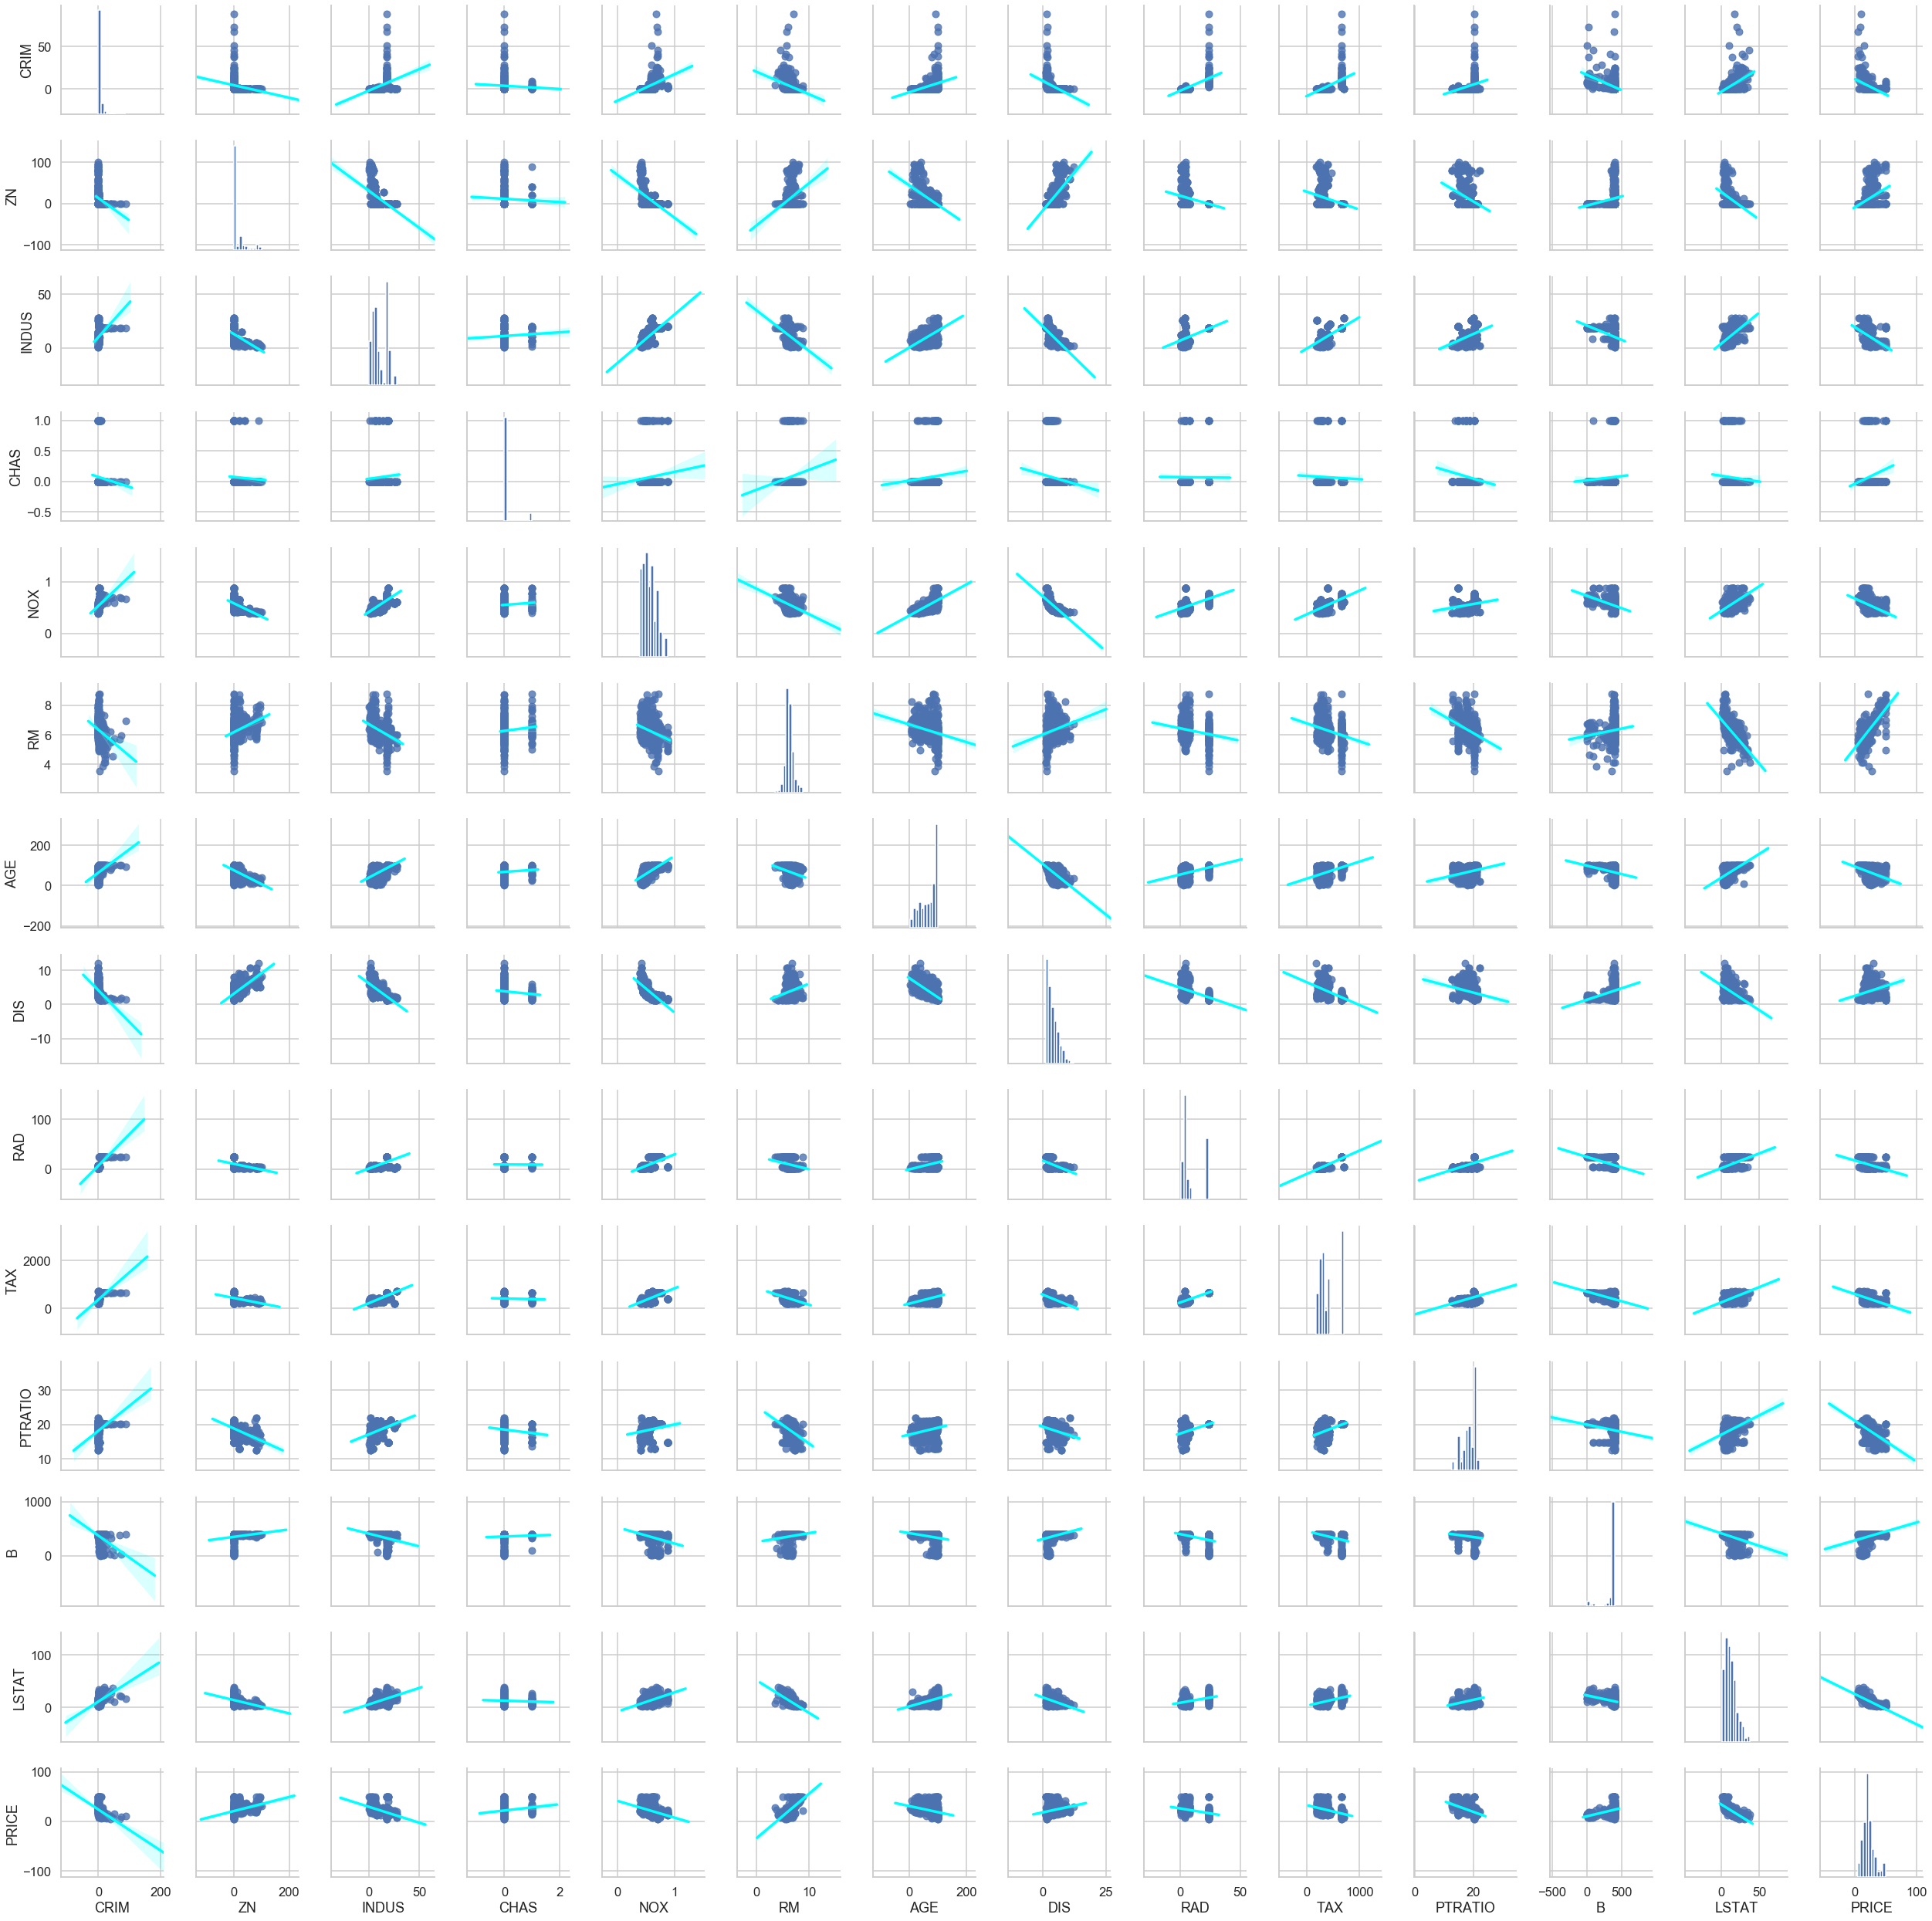

In [40]:
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training and Test Dataset Split

In [41]:
prices=data['PRICE']
features=data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,
                                               test_size=0.2,random_state=10)



## Multivariable Regression

In [42]:
regr=LinearRegression()
regr.fit(X_train,y_train)

print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['Coef'])

Intercept 36.53305138282439


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [43]:
print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628


## Data Transformations

In [44]:
data['PRICE'].skew()

1.1080984082549072

In [45]:
y_log=np.log(data['PRICE'])

In [46]:
y_log.skew()

-0.33032129530987864

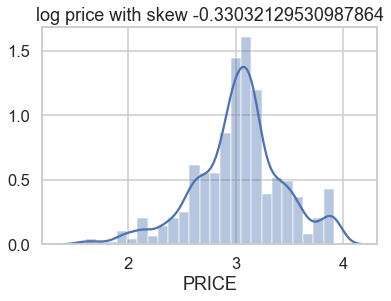

In [47]:
sns.distplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

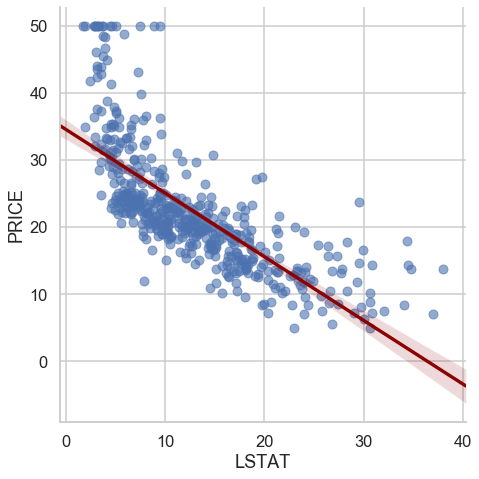

In [48]:
sns.lmplot('LSTAT','PRICE',data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})

plt.show()

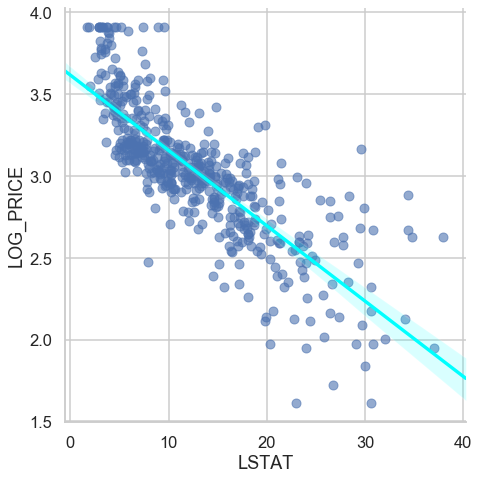

In [49]:
transformed_data=features
transformed_data['LOG_PRICE']=y_log

sns.lmplot('LSTAT','LOG_PRICE',transformed_data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'cyan'})

plt.show()

### Regression using log prices

In [50]:
prices=np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,
                                               test_size=0.2,random_state=10)

regr=LinearRegression()
regr.fit(X_train,y_train)

print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['Coef'])

Intercept 4.05994387177519


,Coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [51]:
print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))

Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260724


## p values and evaluating coefficients

In [52]:
X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,4)})

C:\Users\Sushant Lenka\.conda\envs\machineLearning\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,pvalue
const,4.059944,0.0000
CRIM,-0.010672,0.0000
ZN,0.001579,0.0086
INDUS,0.002030,0.4445
CHAS,0.080331,0.0382
NOX,-0.704068,0.0000
RM,0.073404,0.0001
AGE,0.000763,0.2092
DIS,-0.047633,0.0000
RAD,0.014565,0.0000


## Testing for Multicollinearity

In [53]:
variance_inflation_factor(exog=X_incl_const.values,exog_idx=1)

1.7145250443932485

In [54]:
vif=[]
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
    if i!=0:
        print(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))

1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [55]:
pd.DataFrame({'coef_name':X_incl_const.columns,
             'vif':vif})

,coef_name,vif
0,const,597.548713
1,CRIM,1.714525
2,ZN,2.332822
3,INDUS,3.943449
4,CHAS,1.078813
5,NOX,4.410321
6,RM,1.840405
7,AGE,3.326766
8,DIS,4.222923
9,RAD,7.314300


## Model Simplification and the BIC

In [56]:
X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

org_coef=pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,4)})

print('bic is: ',results.bic)
print('r-squared is: ',results.rsquared)

bic is:  -139.74997769478875
r-squared is:  0.7930234826697582


In [57]:
X_incl_const=sm.add_constant(X_train)
X_incl_const=X_incl_const.drop(['INDUS'],axis=1)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

coef_minus_indus=pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,4)})

print('bic is: ',results.bic)
print('r-squared is: ',results.rsquared)

bic is:  -145.14508855591163
r-squared is:  0.7927126289415163


In [58]:
X_incl_const=sm.add_constant(X_train)
X_incl_const=X_incl_const.drop(['INDUS','AGE'],axis=1)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

reduced_coef=pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,4)})

print('bic is: ',results.bic)
print('r-squared is: ',results.rsquared)

bic is:  -149.49934294224656
r-squared is:  0.7918657661852815


In [59]:
frames=[org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames,axis=1)

C:\Users\Sushant Lenka\.conda\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,pvalue,coef,pvalue,coef,pvalue
AGE,0.000763,0.2092,0.000766,0.2070,NaN,NaN
B,0.000516,0.0000,0.000511,0.0000,0.000518,0.0000
CHAS,0.080331,0.0382,0.082795,0.0320,0.086449,0.0249
CRIM,-0.010672,0.0000,-0.010721,0.0000,-0.010702,0.0000
DIS,-0.047633,0.0000,-0.049394,0.0000,-0.052692,0.0000
INDUS,0.002030,0.4445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.0000,-0.031262,0.0000,-0.030271,0.0000
NOX,-0.704068,0.0000,-0.673365,0.0000,-0.616448,0.0001
PTRATIO,-0.034795,0.0000,-0.034126,0.0000,-0.033481,0.0000
RAD,0.014565,0.0000,0.014014,0.0000,0.013743,0.0000


## Residuals and Residual Plots

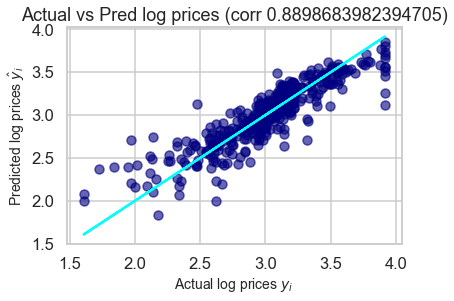

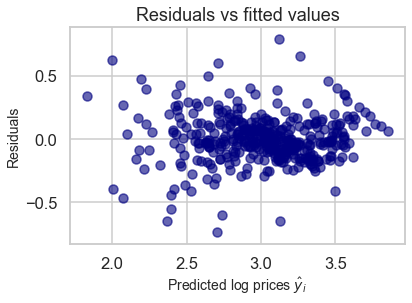

In [60]:
prices=np.log(data['PRICE'])
features=data.drop(['PRICE','AGE','INDUS'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,
                                               test_size=0.2,random_state=10)

X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

# residuals=y_train-results.fittedvalues
# residuals.describe()
# results.resid

corr=y_train.corr(results.fittedvalues)
plt.scatter(y_train,results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,c='cyan')

plt.xlabel('Actual log prices $y _i$',fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Pred log prices (corr {corr})')

plt.show()

#residuals vs predicted values
plt.scatter(results.fittedvalues,results.resid,c='navy',alpha=0.6)


plt.xlabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title(f'Residuals vs fitted values')

plt.show()



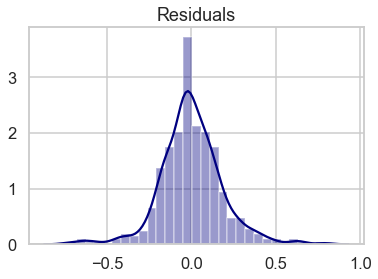

In [61]:
# Checking for normality

resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
resid_skew

sns.distplot(results.resid,color='navy')
plt.title('Residuals')
plt.show()

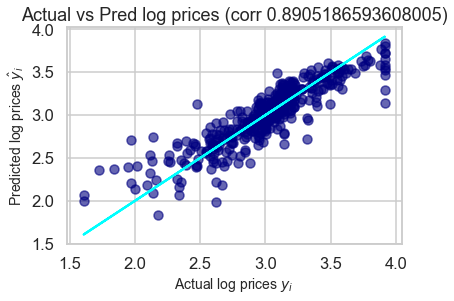

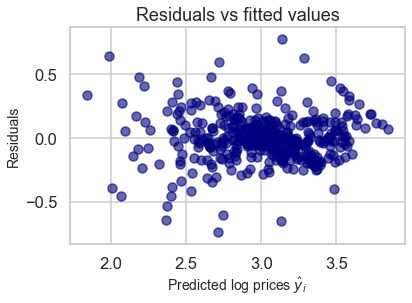

In [62]:
# Generating the above plots using the previous model
prices=np.log(data['PRICE'])
features=data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,
                                               test_size=0.2,random_state=10)

X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

# residuals=y_train-results.fittedvalues
# residuals.describe()
# results.resid

corr=y_train.corr(results.fittedvalues)
plt.scatter(y_train,results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,c='cyan')

plt.xlabel('Actual log prices $y _i$',fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Pred log prices (corr {corr})')

plt.show()

#residuals vs predicted values
plt.scatter(results.fittedvalues,results.resid,c='navy',alpha=0.6)


plt.xlabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title(f'Residuals vs fitted values')

plt.show()


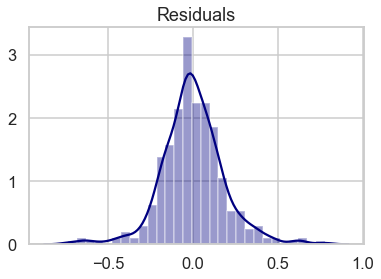

In [63]:
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
resid_skew

sns.distplot(results.resid,color='navy')
plt.title('Residuals')
plt.show()

In [64]:
resid_mean

0.0

In [65]:
resid_skew


0.093

C:\Users\Sushant Lenka\.conda\envs\machineLearning\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


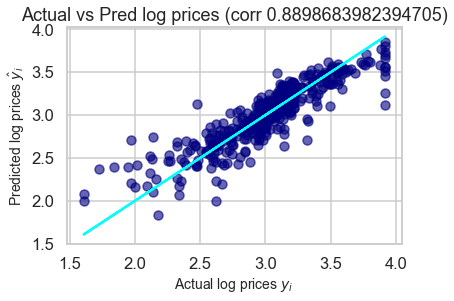

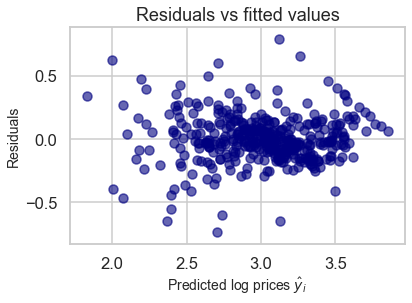

In [72]:
prices=np.log(data['PRICE'])
features=data.drop(['PRICE','AGE','INDUS'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,prices,
                                               test_size=0.2,random_state=10)

X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

# residuals=y_train-results.fittedvalues
# residuals.describe()
# results.resid

corr=y_train.corr(results.fittedvalues)
plt.scatter(y_train,results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,c='cyan')

plt.xlabel('Actual log prices $y _i$',fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.title(f'Actual vs Pred log prices (corr {corr})')

plt.show()

#residuals vs predicted values
plt.scatter(results.fittedvalues,results.resid,c='navy',alpha=0.6)


plt.xlabel('Predicted log prices $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title(f'Residuals vs fitted values')

plt.show()

#accessing mse
reduced_log_mse=round(results.mse_resid,3)
reduced_log_rsquared=round(results.rsquared,3)




In [73]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared],'MSE':[reduced_log_mse],'RMSE':[np.power(reduced_log_mse,0.5)]},index=['Reduced log model'])

,R-Squared,MSE,RMSE
Reduced log model,0.792,0.035,0.187083


In [79]:
print('1 S.D in log prices: ',np.sqrt(reduced_log_mse))
print('2 S.D in log prices: ',2*np.sqrt(reduced_log_mse))

upper_bound=np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a given 30K home is :', upper_bound)
print('The upper bound in normal prices for a given 30K home is :', np.e**upper_bound)

lower_bound=np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a given 30K home is :', lower_bound)
print('The upper bound in normal prices for a given 30K home is :', np.e**lower_bound)

1 S.D in log prices:  0.18708286933869708
2 S.D in log prices:  0.37416573867739417
The upper bound in log prices for a given 30K home is : 3.7753631203395495
The upper bound in normal prices for a given 30K home is : 43.61334233239937
The upper bound in log prices for a given 30K home is : 3.0270316429847615
The upper bound in normal prices for a given 30K home is : 20.635886906824155
